<a href="https://colab.research.google.com/github/MiharaEk/ML_Assignment/blob/master/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  ## Dataset: Cardiovascular heart disease
  ## Dataset URL: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset
  ## Algorithms Used: Decision Tree


# Setup <a class="anchor"  id="setup"></a>


Importing all the required libraries and functions

In [ ]:
!pip uninstall scikit-learn
!pip install scikit-learn
!pip install matplotlib

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/scikit_learn-1.2.2.dist-info/*
    /usr/local/lib/python3.9/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.9/dist-packages/sklearn/*
Proceed (Y/n)? y
  Successfully uninstalled scikit-learn-1.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 73.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
### Data Handline
import pandas as pd
import numpy as np

### Utility
import math
import warnings
import string

### Plotting
# Matplotlib
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D


# Model
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Scikit-learn
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import ConfusionMatrixDisplay 


#LDA
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_selection import SequentialFeatureSelector

#RND Forest
from sklearn.ensemble import RandomForestClassifier

# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

#Support Vector Classifier
from sklearn import svm
from sklearn.svm import LinearSVC

# Seaborn
import seaborn as sns

warnings.filterwarnings("ignore")

**Load dataset.**

In [ ]:
dataset = pd.read_csv("/content/cardio_train.csv",delimiter=";")

dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


# Data Preprocessing

In [ ]:
number_of_entity = dataset.shape[0]*dataset.shape[1]
print('Number of entries in the dataframe: ', number_of_entity)

missing_value_count = dataset.isna().sum().sum()
print('Missing values: ', missing_value_count, '\n')

df_duplicate = dataset.duplicated().sum()
if df_duplicate:
    print('Duplicates Rows in Dataset are : {}'.format(df_duplicate))
else:
    print('Dataset contains no Duplicate Values')

Number of entries in the dataframe:  910000
Missing values:  0 

Dataset contains no Duplicate Values


In [ ]:
#Remove all duplicated rows.
dataset.drop_duplicates(inplace=True)

#Remove id column because it is clearly not correlated in any way with the target
dataset.drop(['id'], axis=1,inplace=True)

In [ ]:
dataset.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


**Observations**
- The 'Age' column needs to be recalculated because it contains minimum values that are unrealistic and suggest missing or incorrect data.
- The 'Weight' column contains minimum and maximum values that are unrealistic and need to be adjusted.
- The Systolic blood pressure "ap_hi" and Diastolic blood pressure "ap_lo" columns cannot have negative values.
- If the values in the ap_hi and ap_lo columns exceed 180 mmHg and 120 mmHg respectively, this indicates a hypertensive crisis, which is a medical emergency, so the maximum values in these columns should be adjusted accordingly.





In [ ]:
#The 'Age' column in the dataset is expressed in days, so we need to convert it to years.
dataset['age'] = dataset['age'].apply(lambda x: x/365)  

In [ ]:
outliers = len(dataset[(dataset["ap_hi"]>=280) | (dataset["ap_lo"]>=220) | (dataset["ap_lo"] < 0) | (dataset["ap_hi"] < 0) | (dataset["ap_hi"]<dataset["ap_lo"])])

print(f'Have total {outliers} outliers')
print(f'percent missing: {round(outliers/len(dataset)*100,1)}%')

Have total 1275 outliers
percent missing: 1.8%


In [ ]:
#Filtering oSystolic blood pressure and Diastolic blood pressure
dataset = dataset[ (dataset['ap_lo'] >= 0) & (dataset['ap_hi'] >= 0) ]  #remove negative values
dataset = dataset[ (dataset['ap_lo'] <= 220) & (dataset['ap_hi'] <= 280) ]  #remove fishy data points
dataset = dataset[ (dataset['ap_lo'] < dataset['ap_hi']) ]  #remove systolic higher than diastolic


In [ ]:
Q1_hi = dataset['ap_hi'].quantile(0.05) # 5th percentile of the data of the given feature
Q3_hi = dataset['ap_hi'].quantile(0.95)  # 95th percentile of the data of the given feature
IQR_hi = Q3_hi - Q1_hi
lower, upper = Q1_hi - 1.5 * IQR_hi, Q3_hi + 1.5 * IQR_hi
dataset = dataset[(dataset['ap_hi'] >= lower) & (dataset['ap_hi'] <= upper)]  

Q1_lo = dataset['ap_lo'].quantile(0.05) # 5th percentile of the data of the given feature
Q3_lo = dataset['ap_lo'].quantile(0.95)  # 95th percentile of the data of the given feature
IQR_lo = Q3_lo - Q1_lo
lower, upper = Q1_lo - 1.5 * IQR_lo, Q3_lo + 1.5 * IQR_lo
dataset = dataset[(dataset['ap_lo'] >= lower) & (dataset['ap_lo'] <= upper)]  

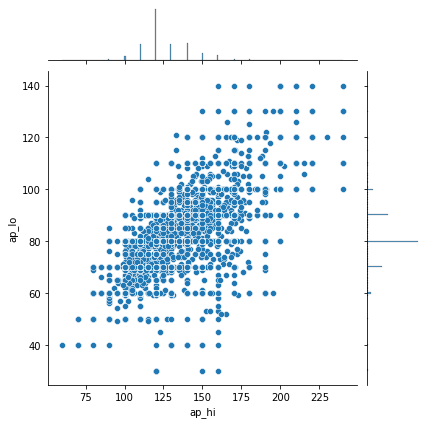

In [ ]:
sns.jointplot(x='ap_hi', y='ap_lo', data=dataset);

## 1.1 - IQR based filtering - height, weight <a class="anchor"  id="iqr"></a>





<Axes: >

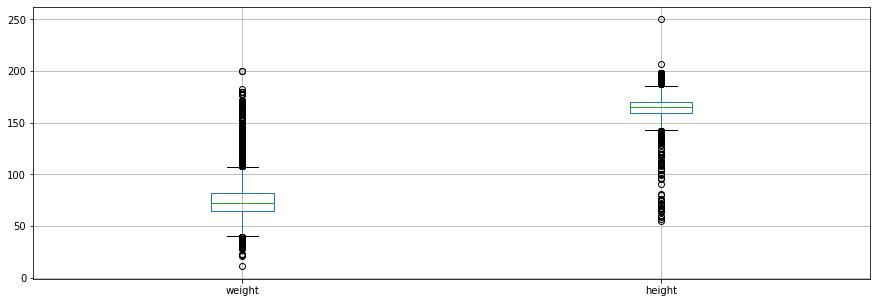

In [ ]:
plt.figure(figsize=(15,5))
dataset.boxplot(['weight','height'])

In [ ]:
#Filtering out the smallest and tallest human ever known were 54 cm and 251 cm respectively
len(dataset[(dataset['height'] > 251) | (dataset['height'] < 54)])

0

In [ ]:
#Function that detects the outlier given interquartile range
def detect_outliers(df,q1,q3):
  for col in df.columns:
    df_feature = df[col]
    Q1 = df_feature.quantile(q1) # 25th percentile of the data of the given feature
    Q3 = df_feature.quantile(q3)  # 75th percentile of the data of the given feature
    IQR = Q3 - Q1    #IQR is interquartile range. 
    print(f'Feature: {col}-------------')
    print(f'Percentiles: {int(q1*100)}th={Q1}, {int(q3*100)}th={Q3}, IQR={IQR}')
    # calculate the outlier lower and upper bound
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    # identify outliers
    outliers = [x for x in df_feature if x < lower or x > upper]
    print('Identified outliers: %d \n' % len(outliers))
    # remove outliers 
    #dataset = df[(df_feature >= lower) & (df_feature <= upper)]  
  
detect_outliers(dataset[['height', 'weight']],0.05,0.95)

Feature: height-------------
Percentiles: 5th=152.0, 95th=178.0, IQR=26.0
Identified outliers: 46 

Feature: weight-------------
Percentiles: 5th=55.0, 95th=100.0, IQR=45.0
Identified outliers: 20 



In [ ]:
#After the observation we can remove the outliers weight, height
dataset_cleaned = dataset 
for col in ['height','weight']:
  Q1 = dataset[col].quantile(0.05) # 5th percentile of the data of the given feature
  Q3 = dataset[col].quantile(0.95)  # 95th percentile of the data of the given feature
  IQR = Q3 - Q1
  lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
  dataset_cleaned = dataset_cleaned[(dataset_cleaned[col] >= lower) & (dataset_cleaned[col] <= upper)]  


## 1.2 - BMI - filtering <a class="anchor"  id="bmi"></a>

One way to potentially gain better insights from the data is to create a new feature called the Body Mass Index (BMI), which takes into account both height and weight. The BMI provides information about a person's general health status, indicating whether they fall within a normal weight range or not. The formula used to calculate BMI can be applied to the data.

\begin{equation}
BMI = \tfrac{weight}{height^2}
\end{equation}

*BMI = kg/m2 where kg is a person's weight in kilograms and m2 is their height in metres squared*

In [ ]:
# calculating the patient BMI (Body Mass Index)  
dataset_cleaned['BMI'] = round(dataset_cleaned['weight']/((dataset_cleaned['height']/100)**2),1)
dataset_cleaned.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,22.0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.9
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.5
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.7
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.0


In [ ]:
#The BMI data can be filtered to exclude extreme values that fall outside the healthy range according to the BMI chart.
dataset_cleaned = dataset_cleaned[ (dataset_cleaned['BMI'] < 60) & (dataset_cleaned['BMI'] > 10)]

In [ ]:
#Dataset after cleaning
print(f'Number of rows of dataset dataset after data preprocessing: {len(dataset_cleaned)}')
print(f'How much percent missing: {round((70000-len(dataset_cleaned))/70000*100,2)}%')

Number of rows of dataset dataset after data preprocessing: 68584
How much percent missing: 2.02%


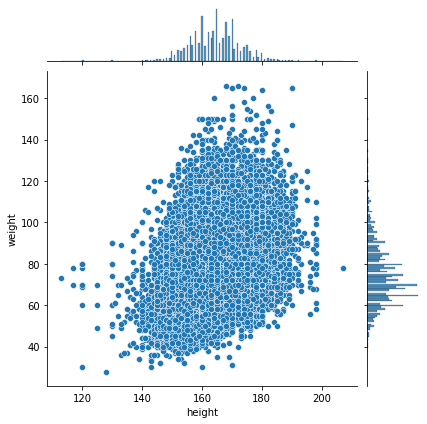

In [ ]:
#For exploring the joint distribution of two numerical features, the Seaborn library's jointplot function can be an effective tool to use.
sns.jointplot(x='height', y='weight', data=dataset_cleaned);

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

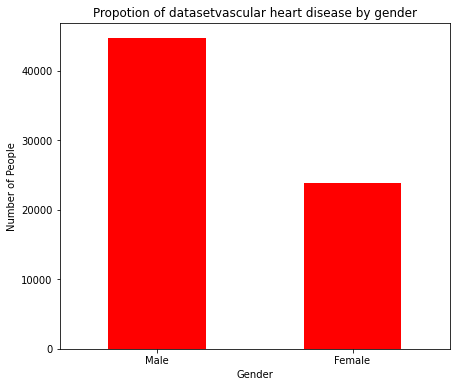

In [ ]:
#Distribution of datasetvascular heart disease by gender
gender = dataset_cleaned['gender'].value_counts()
plt.figure(figsize=(7, 6))
ax = gender.plot(kind='bar', rot=0, color="r")
ax.set_title("Propotion of datasetvascular heart disease by gender", y = 1)
ax.set_xlabel('Gender')
ax.set_ylabel('Number of People')
ax.set_xticklabels(('Male', 'Female'))

- Based on the bar chart, it is evident that the likelihood of contracting the disease is greater among males compared to females.

# 2 - Feature Engineering <a class="anchor"  id="feature"></a>

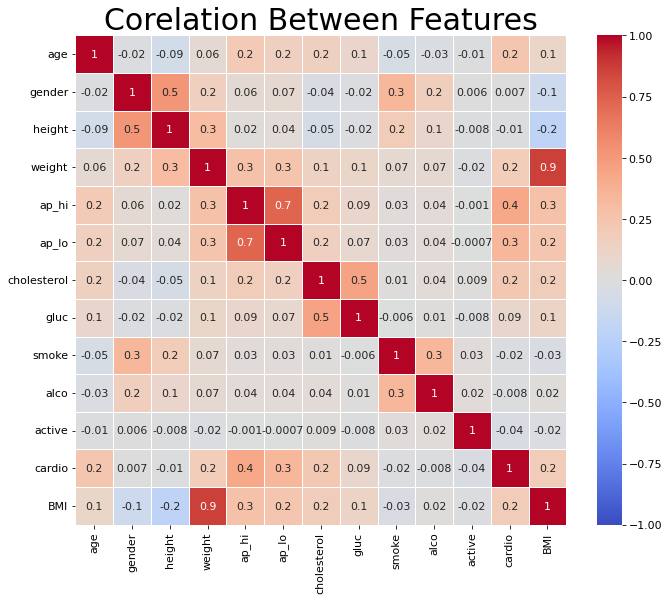

In [ ]:
#plotting correlation map
plt.rcParams.update({'font.size': 11})
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(dataset_cleaned.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', ax=ax, fmt='.1g', linewidths=.5);
plt.title('Corelation Between Features', fontsize = 30)
plt.show()

**Observations**
*   Age and cholesterol exhibit a noteworthy influence on the target variable, but their correlation is not particularly strong
*   Ap_hi displays the strongest correlation with the target variable, making it a crucial feature for our model. Ap_lo exhibits a similar pattern.
*   Although the newly created feature "BMI" is not highly correlated with the target variable, it does exhibit a high correlation with "weight". As such, it may be beneficial to drop one of these features to avoid potential multicollinearity issues.
*   Among the features, "gender", "smoking", and "height" display the weakest correlation with the target variable.




# 3- ML models <a class="anchor"  id="mlmodels"></a>

## 3.1 - Model preparation <a class="anchor"  id="modelprep"></a>




In [ ]:
#Standardization
dataset_scaled=dataset_cleaned.copy()

columns_to_scale = ['age', 'weight', 'ap_hi', 'ap_lo','cholesterol','gender','BMI','height']

scaler = StandardScaler()
dataset_scaled[columns_to_scale] = scaler.fit_transform(dataset_cleaned[columns_to_scale])

dataset_scaled.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,-0.434227,1.366947,0.453582,-0.853029,-0.999477,-0.137142,-0.537143,1,0,0,1,0,-1.047959
1,0.309323,-0.731557,-1.063527,0.772526,0.799796,0.923664,2.408948,1,0,0,1,1,1.437575
2,-0.246212,-0.731557,0.074304,-0.711677,0.200039,-1.197948,2.408948,1,0,0,0,1,-0.758943
3,-0.746234,1.366947,0.580007,0.560497,1.399554,1.984469,-0.537143,1,0,0,1,1,0.242977
4,-0.806609,-0.731557,-1.063527,-1.277087,-1.599234,-2.258753,-0.537143,1,0,0,0,0,-0.855282


The Minmax Scaler offers a different way of normalizing the features. 

In [ ]:
#Standardization
dataset_scaled_mm=dataset_cleaned.copy()

columns_to_scale_mm = ['age', 'weight', 'ap_hi', 'ap_lo','cholesterol','gender','BMI','height']

mmscaler = MinMaxScaler()
dataset_scaled_mm[columns_to_scale_mm] = mmscaler.fit_transform(dataset_cleaned[columns_to_scale_mm])

dataset_scaled_mm.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0.588076,1.0,0.585106,0.246377,0.277778,0.454545,0.0,1,0,0,1,0,0.231557
1,0.730159,0.0,0.457447,0.413043,0.444444,0.545455,1.0,1,0,0,1,1,0.495902
2,0.624003,0.0,0.553191,0.260870,0.388889,0.363636,1.0,1,0,0,0,1,0.262295
3,0.528455,1.0,0.595745,0.391304,0.500000,0.636364,0.0,1,0,0,1,1,0.368852
4,0.516918,0.0,0.457447,0.202899,0.222222,0.272727,0.0,1,0,0,0,0,0.252049




---


**Train test split**

split ratio 80:20

In [ ]:
#Train-test-split for non-scaled data
X = dataset_cleaned.drop(['cardio'], axis=1) #features 
y = dataset_cleaned['cardio']  #target feature

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)


#Train-test-split for scaled data
X_scaled = dataset_scaled.drop(['cardio'], axis=1) #features 
y_scaled = dataset_scaled['cardio']  #target feature

X_scaled_mm = dataset_scaled_mm.drop(['cardio'], axis=1) #features 
y_scaled_mm = dataset_scaled_mm['cardio']  #target feature

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42, shuffle = True)
X_train_scaled_mm, X_test_scaled_mm, y_train_scaled_mm, y_test_scaled_mm = train_test_split(X_scaled_mm, y_scaled_mm, test_size=0.2, random_state=42, shuffle = True)


#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (54867, 12)
X_test shape is  (13717, 12)
y_train shape is  (54867,)
y_test shape is  (13717,)


## 3.2 - Decision Tree <a class="anchor"  id="dt"></a>

- Default values of Decision Tree
- Tuned Decision Tree

### 3.1.1 - Basic Model

In [ ]:
# min_samples_split: The minimum number of samples required to split an internal node
dtree = DecisionTreeClassifier()

# Build classification tree
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

# Evaluation: Confusion matrix #
################################
dtree_acc = accuracy_score(y_test, y_pred)   # accuracy score
cm_dtree = confusion_matrix(y_test, y_pred) # Confusion matrix 
tpr_dtree = cm_dtree[1][1] /(cm_dtree[1][0] + cm_dtree[1][1])

print("Accuracy:",dtree_acc)
print('Sensitivity (TPR) =', tpr_dtree)


print('\n Confusion matrix \n \n')
print(classification_report(y_test, y_pred ))

# plot_confusion_matrix(dtree, X_test, y_test)
plt.show()

Accuracy: 0.631187577458628
Sensitivity (TPR) = 0.625852356952268

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.64      0.64      0.64      6971
           1       0.62      0.63      0.63      6746

    accuracy                           0.63     13717
   macro avg       0.63      0.63      0.63     13717
weighted avg       0.63      0.63      0.63     13717



### 3.1.2 - Tuned Decision Tree <a class="anchor"  id="dt1"></a>

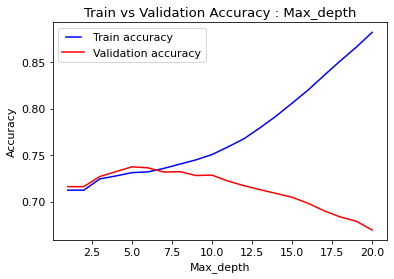

In [ ]:
#Hyperparameter tuning for max_depth
train_acc1 = []
val_acc1 = []

for max_d in range(1,21):
  model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
  model.fit(X_train, y_train)
  train_acc1.append(model.score(X_train, y_train))
  val_acc1.append(model.score(X_test,y_test))

line1, = plt.plot([*range(1,21)], train_acc1, 'b', label='Train accuracy')
line2, = plt.plot([*range(1,21)], val_acc1, 'r', label='Validation accuracy')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.title('Train vs Validation Accuracy : Max_depth')
plt.ylabel('Accuracy')
plt.xlabel('Max_depth')
plt.show()

train_acc1.clear()
val_acc1.clear()

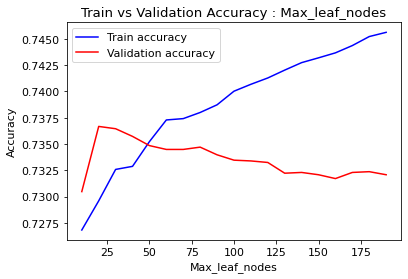

In [ ]:
#Hyperparameter tuning for max_leaf_nodes
train_acc2 = []
val_acc2 = []

for max_ln in range(10,200,10):
  model2 = DecisionTreeClassifier(max_leaf_nodes=max_ln, random_state=42)
  model2.fit(X_train, y_train)
  train_acc2.append(model2.score(X_train, y_train))
  val_acc2.append(model2.score(X_test,y_test))


line3, = plt.plot([*range(10,200,10)], train_acc2, 'b', label='Train accuracy')
line4, = plt.plot([*range(10,200,10)], val_acc2, 'r', label='Validation accuracy')

plt.legend(handler_map={line2: HandlerLine2D(numpoints=2)})
plt.title('Train vs Validation Accuracy : Max_leaf_nodes')
plt.ylabel('Accuracy')
plt.xlabel('Max_leaf_nodes')
plt.show()

train_acc2.clear()
val_acc2.clear()

re-train the model with above parameters.

In [ ]:
# min_samples_split: The minimum number of samples required to split an internal node
dtree_tuned = DecisionTreeClassifier(max_leaf_nodes=25,max_depth=5)

# Build classification tree
dtree_tuned.fit(X_train, y_train)

y_pred = dtree_tuned.predict(X_test)

# Evaluation: Confusion matrix #
################################
dtree_tuned_acc = accuracy_score(y_test, y_pred)   # accuracy score
cm_dtree_tuned = confusion_matrix(y_test, y_pred) # Confusion matrix 
tpr_dree_tuned = cm_dtree_tuned[1][1] /(cm_dtree_tuned[1][0] + cm_dtree_tuned[1][1])

print("Accuracy:",dtree_tuned_acc)  
print('Sensitivity (TPR) =', tpr_dree_tuned)

print('\n Confusion matrix \n \n')
print(classification_report(y_test, y_pred ))

# plot_confusion_matrix(dtree_tuned, X_test, y_test)
plt.show()

Accuracy: 0.7374061383684479
Sensitivity (TPR) = 0.681589089831011

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      6971
           1       0.76      0.68      0.72      6746

    accuracy                           0.74     13717
   macro avg       0.74      0.74      0.74     13717
weighted avg       0.74      0.74      0.74     13717



In [ ]:
#collect results
tpr_weight = 0.25
models = pd.DataFrame({
    'Model': ['Decision Tree'],
    'Accuracy': [dtree_tuned_acc],
                    
    'Sensitivity' : [tpr_dree_tuned,],
    'Objective Value' : [dtree_tuned_acc+tpr_dree_tuned*tpr_weight]
})

models

,Model,Accuracy,Sensitivity,Objective Value
0,Decision Tree,0.737406,0.681589,0.907803


In [ ]:
#collect results for plotting
df_plotting = pd.DataFrame({
    'Model': ['Decision Tree', 
              'Decision Tree'],
    'Values': [dtree_tuned_acc, 
             tpr_dree_tuned],
    'Type': ['Accuracy', 
             'Sensitivity'],
    'Color': ['green' , 'green']})

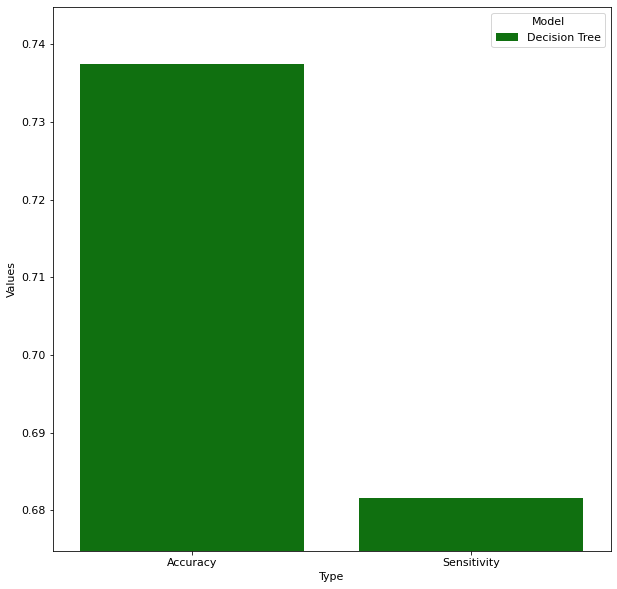

In [ ]:
#plot result comparison
plt.figure(figsize=(10,10))
sns.barplot(y=df_plotting['Values'], x=df_plotting['Type'], hue=df_plotting['Model'], orient="v", palette=df_plotting['Color'])
plt.ylim(min(df_plotting['Values']) * 0.99, max(df_plotting['Values']) * 1.01)
#plt.gcf().set_size_inches(50,10)
plt.show()

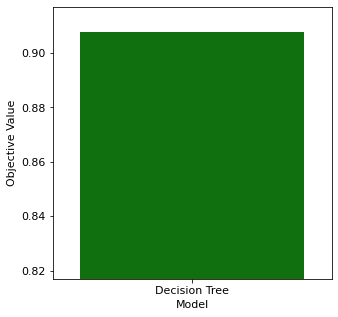

In [ ]:
#plot result comparison
plt.figure(figsize=(5,5))
sns.barplot(y=models['Objective Value'],x=models['Model'], orient ="v", palette=df_plotting['Color'])
#sns.barplot(y=models['Sensitivity'],x=models['Model'], orient ="v")
plt.ylim(min(models['Objective Value'])* 0.9, max(models['Objective Value'])*1.01)
#sns.despine()
plt.show()